In [1]:
!pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import random as rd

In [3]:
from dataclasses import dataclass, field

@dataclass
class MazeCell:
    x: int
    y: int
    component: int
    is_open: bool = field(default=False)
    walls: list = field(default_factory=list)

In [4]:
N = 30
LINE_WIDTH = 50

In [5]:
import random as rd

class MazeCell:
    def __init__(self, x, y, component, is_open, walls):
        self.x = x
        self.y = y
        self.component = component
        self.is_open = is_open
        self.walls = walls

# Проверка, что все клетки лабиринта принадлежат одной компоненте связности
def check_components(maze):
    initial_component = maze[0].component
    for cell in maze:
        if cell.component != initial_component:
            return True
    return False

# Проверяет, принадлежат ли два элемента одному множеству
def find(x, y):
    return x.component == y.component

# Находит все элементы множества
def find_set(component, maze):
    return [cell for cell in maze if cell.component == component]

# Объединяет два множества
def union(x, y, maze):
    if not find(x, y):
        for cell in find_set(y.component, maze):
            cell.component = x.component
        return True
    return False

# Получает соседей текущей ячейки
def get_neighbours(x, y, maze):
    neighbours = []
    for cell in maze:
        if (x - 1 == cell.x and y == cell.y) or (x + 1 == cell.x and y == cell.y) or (y - 1 == cell.y and x == cell.x) or (y + 1 == cell.y and x == cell.x):
            neighbours.append(cell)
    return neighbours

# Удаляет стены между текущей ячейкой и соседом
def delete_walls(cell, neighbour):
    dx, dy = neighbour.x - cell.x, neighbour.y - cell.y
    if dx > 0:
        cell.walls[1] = False
        neighbour.walls[3] = False
    elif dx < 0:
        cell.walls[3] = False
        neighbour.walls[1] = False
    if dy > 0:
        cell.walls[2] = False
        neighbour.walls[0] = False
    elif dy < 0:
        cell.walls[0] = False
        neighbour.walls[2] = False

# Выбор случайной ячейки из списка
def rand_choice(choices):
    return rd.choice(choices)

# Генерация лабиринта
def generate_maze(N):
    maze = []
    n = 0
    for y in range(N):
        for x in range(N):
            maze.append(MazeCell(x, y, n, False, [True, True, True, True]))
            n += 1

    unchosen = maze[:]

    while check_components(maze):
        cell = rand_choice(unchosen)
        x, y = cell.x, cell.y
        neighbours = get_neighbours(x, y, maze)
        neighbour = rand_choice(neighbours)

        if union(cell, neighbour, maze):
            delete_walls(cell, neighbour)

    # Вход сверху, выход снизу
    maze[0].is_open = True
    maze[0].walls[0] = False
    maze[-1].is_open = True
    maze[-1].walls[2] = False

    return maze


In [6]:
maze = generate_maze(N)

In [7]:
def draw_maze(maze):

    for cell in maze:
        if cell.walls[0]:
            start_x, end_x = cell.x, cell.x+1
            start_y, end_y = N - cell.y, N - cell.y
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[1]:
            start_x, end_x = cell.x+1, cell.x+1
            start_y, end_y = N - cell.y, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[2]:
            start_x, end_x = cell.x, cell.x+1
            start_y, end_y = N - cell.y-1, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

        if cell.walls[3]:
            start_x, end_x = cell.x, cell.x
            start_y, end_y = N - cell.y, N - cell.y-1
            plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

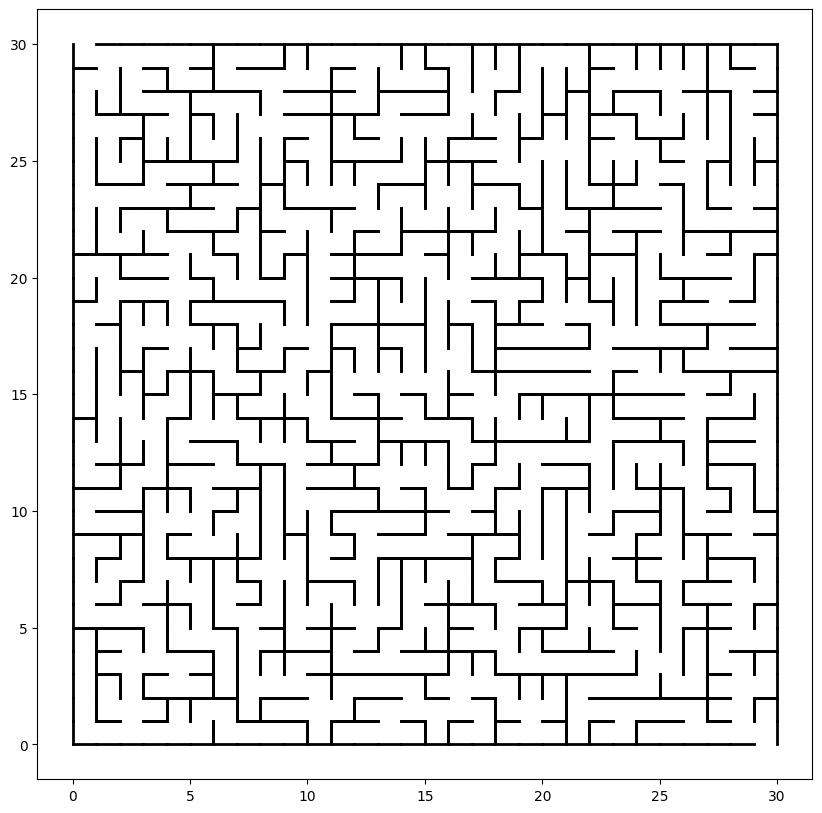

In [8]:
fig = plt.figure(figsize=(10, 10))

draw_maze(maze)

plt.show()

In [9]:
class Maze:

    def __init__(self, n):
        self.maze = []
        self.N = n
        comp = 0
        for y in range(self.N):
            line = []
            for x in range(self.N):
                self.maze.append(MazeCell(x, y, comp, False, [True, True, True, True]))
                comp += 1


        while self.check_comp():
            cell = self.rand_choise()
            if cell is None: break
            x, y = cell.x, cell.y
            neighbours = self.get_neigbours(x, y)
            neighbour = rd.choice(neighbours)

            if self.union(cell, neighbour):
                self.delete_walls(cell, neighbour)


        # вход и выход сделаю только снизу и сверху (слева / справа лень и не суть)

        self.maze[0].is_open = True
        self.maze[0].walls[0] = False
        self.maze[-1].is_open = True
        self.maze[-1].walls[2] = False

    def check_comp(self):
        component = self.maze[0].component
        for i in range(self.N*self.N):
            if component != self.maze[i].component:
                return True

    def find(self, x, y):
        return x.component == y.component


    def find_set(self, x):
        cells = []
        for cell in self.maze:
            if cell.component == x:
                cells.append(cell)

        return cells


    def union(self, x, y):
        if not self.find(x, y):
            for cell in self.find_set(y.component):
                cell.component = x.component
            return True
        return False

    def get_neigbours(self, x, y):
        neighbours = []
        for cell in self.maze:
            if (x-1 == cell.x and y == cell.y) or (x+1 == cell.x and y == cell.y) or (y-1 == cell.y and x == cell.x) or (y+1 == cell.y and x == cell.x):
                neighbours.append(cell)

        return neighbours


    def delete_walls(self, cell, neighbour):
        x, y = neighbour.x - cell.x, neighbour.y - cell.y

        if x > 0:
            cell.walls[1] = False
            neighbour.walls[3] = False
        elif x < 0:
            cell.walls[3] = False
            neighbour.walls[1] = False

        if y > 0:
            cell.walls[2] = False
            neighbour.walls[0] = False
        elif y < 0:
            cell.walls[0] = False
            neighbour.walls[2] = False


    def rand_choise(self):
        return rd.choice(self.maze)


    def draw_walls(self):

        for cell in self.maze:
            if cell.walls[0]:
                start_x, end_x = cell.x, cell.x+1
                start_y, end_y = N - cell.y, N - cell.y
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

            if cell.walls[1]:
                start_x, end_x = cell.x+1, cell.x+1
                start_y, end_y = N - cell.y, N - cell.y-1
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

            if cell.walls[2]:
                start_x, end_x = cell.x, cell.x+1
                start_y, end_y = N - cell.y-1, N - cell.y-1
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

            if cell.walls[3]:
                start_x, end_x = cell.x, cell.x
                start_y, end_y = N - cell.y, N - cell.y-1
                plt.plot([start_x, end_x], [start_y, end_y], 'k-', lw=2)

    def __repr__(self):
        fig = plt.figure(figsize=(10, 10))
        self.draw_walls()
        plt.show()
        return ''

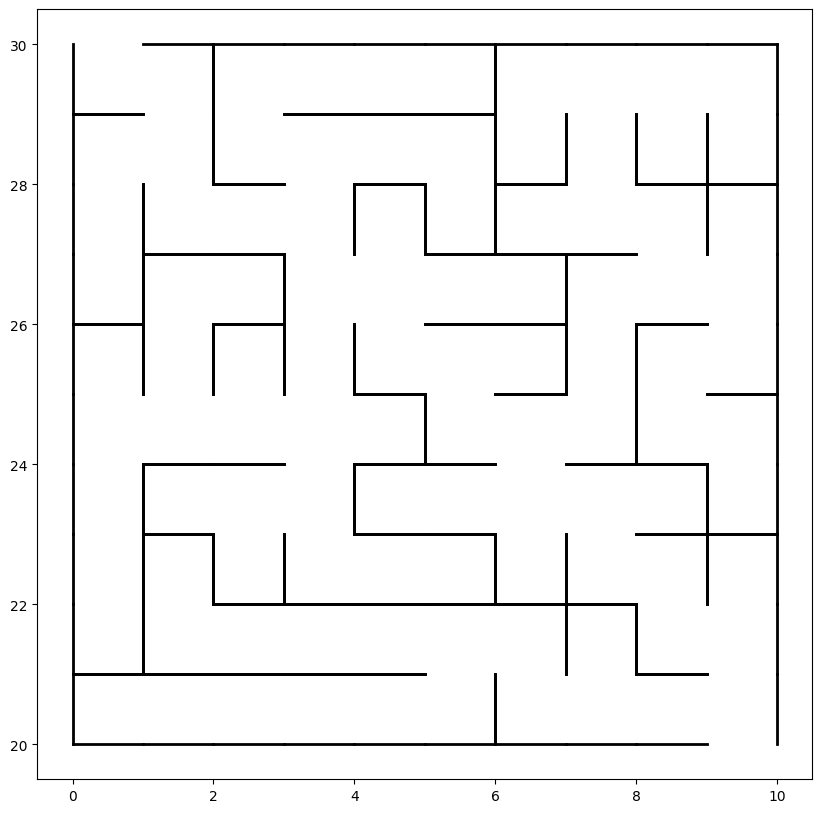

In [10]:
maze = Maze(10)
maze